# **TASK 1**

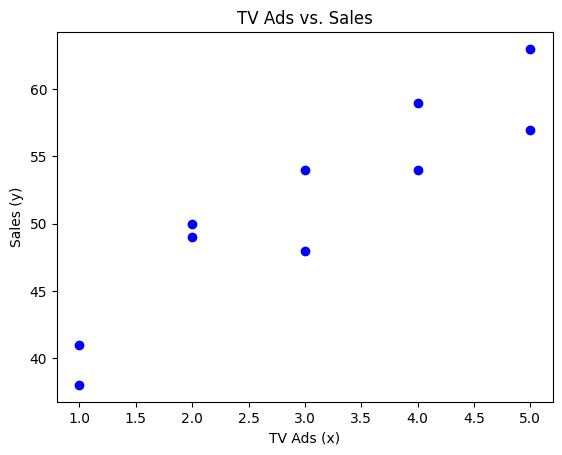

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([2,5,1,3,4,1,5,3,4,2]).reshape(-1, 1)
y = np.array([50,57,41,54,54,38,63,48,59,49])

plt.scatter(x, y, color='blue')
plt.title("TV Ads vs. Sales")
plt.xlabel("TV Ads (x)"), plt.ylabel("Sales (y)")
plt.show()

In [24]:
correlation = np.corrcoef(x.flatten(), y)[0,1]
print(f"Correlation (r): {correlation:.2f}")

Correlation (r): 0.92


In [6]:
model = LinearRegression().fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Equation: y = {slope:.2f}x + {intercept:.2f}")

Equation: y = 4.80x + 36.90


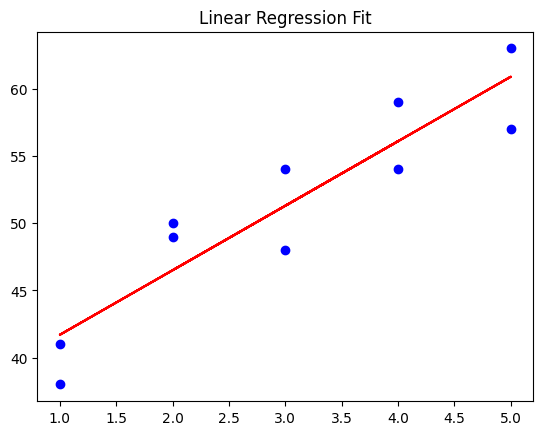

In [7]:
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title("Linear Regression Fit")
plt.show()

# **TASK 2**

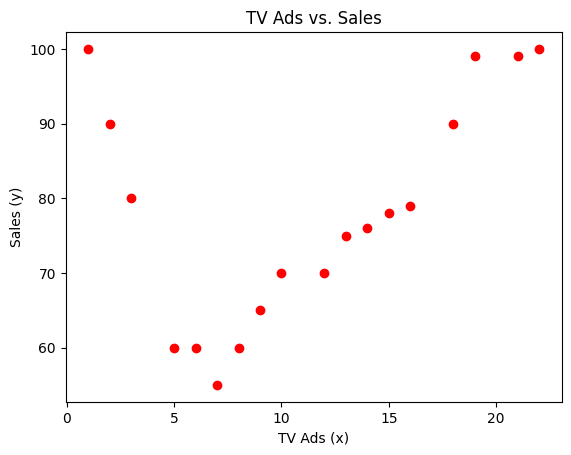

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x2 = np.array([1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22])
y2 = np.array([100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100])

plt.scatter(x2, y2, color='red')
plt.title("TV Ads vs. Sales")
plt.xlabel("TV Ads (x)"), plt.ylabel("Sales (y)")
plt.show()

In [12]:
coefficients = np.polyfit(x2, y2, 2)
poly = np.poly1d(coefficients)
print(f"Quadratic Equation: y = {poly}")

Quadratic Equation: y =         2
0.3002 x - 5.859 x + 94.02


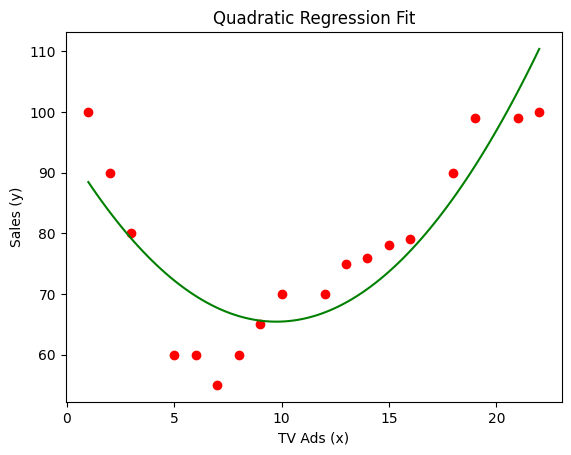

In [26]:
x_values = np.linspace(min(x2), max(x2), 100)
plt.scatter(x2, y2, color='red')
plt.plot(x_values, poly(x_values), color='green')
plt.title("Quadratic Regression Fit")
plt.xlabel("TV Ads (x)"), plt.ylabel("Sales (y)")
plt.show()

In [15]:
print(f"Predicted sales for 20 ads: {poly(20):.1f}")

Predicted sales for 20 ads: 96.9


In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y2, poly(x2))
print(f"R²: {r2:.2f}")

R²: 0.76


# **TASK 3**

In [50]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data = pd.read_csv('adult.csv')

In [51]:
features = data[['age', 'education.num', 'hours.per.week']]
target = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
model = svm.SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      7429
           1       0.74      0.09      0.17      2340

    accuracy                           0.77      9769
   macro avg       0.76      0.54      0.52      9769
weighted avg       0.77      0.77      0.70      9769

Confusion Matrix:
 [[7351   78]
 [2122  218]]


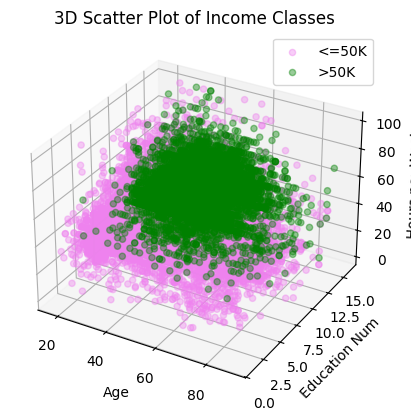

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pos = target == 1
neg = target == 0

ax.scatter(features[neg]['age'], features[neg]['education.num'], features[neg]['hours.per.week'],
           c='violet', label='<=50K', alpha=0.4)
ax.scatter(features[pos]['age'], features[pos]['education.num'], features[pos]['hours.per.week'],
           c='green', label='>50K', alpha=0.4)

ax.set_xlabel('Age')
ax.set_ylabel('Education Num')
ax.set_zlabel('Hours per Week')
ax.set_title('3D Scatter Plot of Income Classes')
ax.legend()
plt.show()